In [1]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [2]:
import os
import numpy as np
import random

# For the plots
import matplotlib.pyplot as plt

In [3]:
from DatasetLoader_mine2 import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'EnergyConsumptionFraunhofer/electrFraunhofer_daily.csv')

dl = DatasetLoader('EnergyConsumptionFraunhofer', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  EnergyConsumptionFraunhofer
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  EnergyConsumptionFraunhofer
Dataset contains missing values?  False
--------------------------
(314, 365)


In [4]:
sample_len = (matrix_1_norm.shape[0]*matrix_1_norm.shape[1]*15)/(314*365)
print("Sample_len total", sample_len)

np.random.seed(1)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 15.0
[139 232 213 184 138  95 247 273   4 111 147  58] [291 173 224]


### Model HD

In [5]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

 10%|█         | 1/10 [00:06<00:57,  6.35s/it]

Training mean squared error of 0.022


 20%|██        | 2/10 [00:13<00:55,  6.94s/it]

Training mean squared error of 0.016


 30%|███       | 3/10 [00:20<00:48,  6.93s/it]

Training mean squared error of 0.014


 40%|████      | 4/10 [00:29<00:46,  7.73s/it]

Training mean squared error of 0.012


 50%|█████     | 5/10 [00:36<00:37,  7.51s/it]

Training mean squared error of 0.011


 60%|██████    | 6/10 [00:42<00:28,  7.07s/it]

Training mean squared error of 0.010


 70%|███████   | 7/10 [00:49<00:20,  6.86s/it]

Training mean squared error of 0.009


 80%|████████  | 8/10 [00:55<00:13,  6.65s/it]

Training mean squared error of 0.008


 90%|█████████ | 9/10 [01:02<00:06,  6.62s/it]

Training mean squared error of 0.007


100%|██████████| 10/10 [01:08<00:00,  6.82s/it]


Training mean squared error of 0.007


100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

Testing mean squared error of testing 0.024


### Model DNN

In [7]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=True, dataset=1)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1, 40)]      0           []                               
                                                                                                  
 permute_1 (Permute)            (None, 40, 1)        0           ['input_2[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 40, 128)      1152        ['permute_1[0][0]']              
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 40, 128)     512         ['conv1d_4[0][0]']               
 rmalization)                                                                               

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 1/3 [00:59<01:58, 59.36s/it]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 2/3 [01:16<00:34, 34.31s/it]

1/1 [==============================] - 0s 25ms/step


100%|██████████| 3/3 [01:33<00:00, 31.00s/it]


Testing mean squared error of 0.045


### Model VAE

In [8]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_norm, sets_training, retraining=False, dataset="1_5")
model_vae, dif_vae = Test_VAE(vae, matrix_1_norm, sets_testing)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


314
365
314
365
(3768, 41, 1) (3768, 41, 1)
(3768, 41, 1) (3768, 41, 1)
Epoch 1/10
118/118 [==============================] - 9s 13ms/step - loss: 23.2192
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 16.9051
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 16.3065
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 16.3090
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 16.2402
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 16.0534
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 16.0517
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 16.3252
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 16.1537
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 15.9876
314
365
314
365
(942, 41, 1) (942, 41, 1)
(942, 41, 1) (942, 41, 1)
30/30 [======================

[0.15057218, 0.11149013953725859, 0.11056569619998802]
[0.1503659, 0.10619329556654336, 0.10988440030766253]


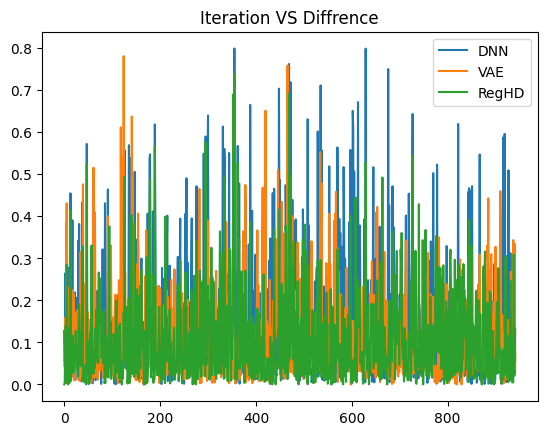

In [9]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

#for i in range(len(vae)):
 #   if vae[i] > 0.7:
  #      vae[i] = 0.7


plt.title("Iteration VS Diffrence")
plt.plot(y, dnn, "-")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.legend(["DNN", 'VAE', "RegHD"])
#plt.xlim(0,200)
plt.show()